In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2 as cv
from PIL import Image

In [2]:
%matplotlib inline

In [3]:
%cd D:\Manu sir\Malaria\cell_images

D:\Manu sir\Malaria\cell_images


In [4]:
un="Uninfected"
#print("no of uninfected images : ",len(os.listdir(un)))

In [5]:
para="Parasitized"
#print("No parasitized images : ",len(os.listdir(para)))

In [6]:
unin=[]
for image in tqdm(os.listdir(un)):
    if image!="Thumbs.db":
        img=Image.open(os.path.join(un,image))
        img=img.resize((64,64))
        img=np.asarray(img)
        unin.append(img)

100%|████████████████████████████████████████████████████████████████████████████| 13780/13780 [02:33<00:00, 89.69it/s]


In [7]:
par=[]
for image in tqdm(os.listdir(para)):
    if image!="Thumbs.db":
        img=Image.open(os.path.join(para,image))
        img=img.resize((64,64))
        img=np.asarray(img)
        par.append(img)

100%|████████████████████████████████████████████████████████████████████████████| 13780/13780 [03:02<00:00, 75.67it/s]


In [8]:
ov_images=unin+par

In [9]:
labels=([0]*(len(os.listdir(un))-1))+([1]*(len(os.listdir(para))-1))

In [10]:
ov_images=np.array(ov_images)

In [11]:
labels=np.array(labels)

In [12]:
ov_images=ov_images/255

In [13]:
from sklearn.utils import shuffle

In [14]:
ov_images,labels=shuffle(ov_images,labels)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(ov_images,labels,test_size=0.2)

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [53]:
tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomHeight(factor=(0.2, 0.3)),
  tf.keras.layers.experimental.preprocessing.RandomWidth(factor=(0.2, 0.3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [51]:
model4 = Sequential()

model4._name="Modified_Xception"
model4.add(Conv2D(16, (3,3), input_shape = (64, 64, 3), activation='relu'))
model4.add(MaxPool2D(2,2))
model4.add(Dropout(0.2))

model4.add(Conv2D(32, (3,3), activation='relu'))
model4.add(MaxPool2D(2,2))
model4.add(Dropout(0.3))

model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation='sigmoid'))

In [52]:
model4.summary()

Model: "Modified_Xception"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 32)  

In [31]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [32]:
history = model4.fit(x_train,y_train,
                              epochs = 20,
                              validation_data=(x_test,y_test))

Epoch 1/20
689/689 [==============================] - 25s 34ms/step - loss: 0.5901 - accuracy: 0.6924 - val_loss: 0.3495 - val_accuracy: 0.8904
Epoch 2/20
689/689 [==============================] - 22s 32ms/step - loss: 0.2613 - accuracy: 0.9061 - val_loss: 0.1780 - val_accuracy: 0.9343
Epoch 3/20
689/689 [==============================] - 21s 31ms/step - loss: 0.2016 - accuracy: 0.9319 - val_loss: 0.1580 - val_accuracy: 0.9468
Epoch 4/20
689/689 [==============================] - 22s 33ms/step - loss: 0.1845 - accuracy: 0.9387 - val_loss: 0.1484 - val_accuracy: 0.9519
Epoch 5/20
689/689 [==============================] - 23s 33ms/step - loss: 0.1774 - accuracy: 0.9440 - val_loss: 0.1473 - val_accuracy: 0.9539
Epoch 6/20
689/689 [==============================] - 24s 35ms/step - loss: 0.1629 - accuracy: 0.9497 - val_loss: 0.1431 - val_accuracy: 0.9556
Epoch 7/20
689/689 [==============================] - 24s 34ms/step - loss: 0.1540 - accuracy: 0.9492 - val_loss: 0.1429 - val_accuracy:

In [33]:
yhat=model4.predict(x_test)>0.5

173/173 [==============================] - 1s 8ms/step


In [34]:
yhat

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [42]:
model4.evaluate(x_test, y_test)

173/173 [==============================] - 1s 6ms/step - loss: 0.1480 - accuracy: 0.9534


[0.14796435832977295, 0.953374445438385]

In [35]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix,f1_score

In [36]:
precision_score(y_test,yhat)

0.9787151702786377

In [37]:
recall_score(y_test,yhat)

0.9260344196265105

In [38]:
f1_score(y_test,yhat)

0.9516462841015993

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

[[2726  202]
 [  55 2529]]


<AxesSubplot:>

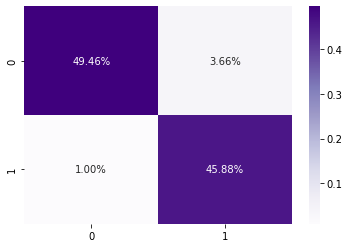

In [40]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(yhat,y_test)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Purples')

In [41]:
import keras

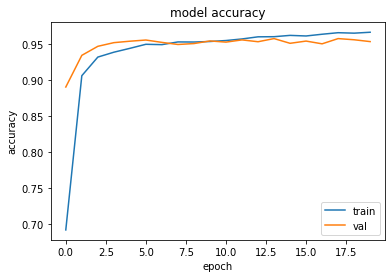

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()